In [6]:
%config InlineBackend.figure_format ='retina'
%matplotlib inline

import networkx as nx
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Set options
sns.set_style('darkgrid')
pd.set_option("display.max_rows", 10)


In [2]:
institutions = pd.read_excel("~/Dropbox/dat/IPEDS_2016-17_Final/HD2016.xlsx")
institutions.columns = [colname.lower() for colname in list(institutions.columns.values)]
institutions

,unitid,instnm,ialias,addr,city,stabbr,zip,fips,obereg,chfnm,...,cbsatype,csa,necta,countycd,countynm,cngdstcd,longitud,latitude,dfrcgid,dfrcuscg
0,100654,Alabama A & M University,AAMU,4900 Meridian Street,Normal,AL,35762,1,5,"Dr. Andrew Hugine, Jr.",...,1,290,-2,1089,Madison County,105,-86.568502,34.783368,128,1
1,100663,University of Alabama at Birmingham,NaN,Administration Bldg Suite 1070,Birmingham,AL,35294-0110,1,5,Ray L. Watts,...,1,142,-2,1073,Jefferson County,107,-86.799345,33.505697,115,1
2,100690,Amridge University,Southern Christian University |Regions University,1200 Taylor Rd,Montgomery,AL,36117-3553,1,5,Michael Turner,...,1,-2,-2,1101,Montgomery County,102,-86.174010,32.362609,236,2
3,100706,University of Alabama in Huntsville,UAH |University of Alabama Huntsville,301 Sparkman Dr,Huntsville,AL,35899,1,5,Robert A. Altenkirch,...,1,290,-2,1089,Madison County,105,-86.640449,34.724557,118,2
4,100724,Alabama State University,NaN,915 S Jackson Street,Montgomery,AL,36104-0271,1,5,Leon Wilson,...,1,-2,-2,1101,Montgomery County,107,-86.295677,32.364317,136,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7516,489973,Relay Graduate School of Education - Camden,NaN,800 Erie Street,Camden,NJ,08102-1741,34,2,NaN,...,1,428,-2,42101,Philadelphia County,4201,-75.135038,39.973897,-2,-2
7517,489982,Relay Graduate School of Education - Denver,NaN,4130 Navajo Street,Denver,CO,80211-2534,8,7,NaN,...,1,216,-2,8031,Denver County,801,-105.003931,39.773640,-2,-2
7518,489991,Relay Graduate School of Education - Nashville,NaN,123 Douglas Avenue,Nashville,TN,37207-5155,47,5,NaN,...,1,400,-2,47037,Davidson County,4705,-86.769241,36.194720,-2,-2
7519,490009,Spartan College of Aeronautics and Technology,NaN,1865 W. 121st Avenue,Westminster,CO,80234-3610,8,7,Nicholas Brown,...,1,216,-2,8001,Adams County,807,-105.009212,39.917028,243,2


In [3]:
peer_lists = pd.read_excel("~/Dropbox/dat/IPEDS_2016-17_Final/CUSTOMCGIDS2016.xlsx")
peer_lists.columns = [colname.lower() for colname in list(peer_lists.columns.values)]
peer_lists

,unitid,cgunitid,cginstnm,cgcity,cgstabbr
0,100654,100706,University of Alabama in Huntsville,Huntsville,AL
1,100654,100724,Alabama State University,Montgomery,AL
2,100654,100830,Auburn University at Montgomery,Montgomery,AL
3,100654,101480,Jacksonville State University,Jacksonville,AL
4,100654,101879,University of North Alabama,Florence,AL
...,...,...,...,...,...
43594,488679,465812,Independence University,Salt Lake City,UT
43595,488679,479956,Pennsylvania State University-World Campus,University Park,PA
43596,488679,480569,Florida Institute of Technology-Online,Melbourne,FL
43597,488679,484631,University of Phoenix-California,Costa Mesa,CA


In [4]:
users = [
    { "id": 0, "name": "Hero" },
    { "id": 1, "name": "Dunn" },
    { "id": 2, "name": "Sue" },
    { "id": 3, "name": "Chi" },
    { "id": 4, "name": "Thor" },
    { "id": 5, "name": "Clive" },
    { "id": 6, "name": "Hicks" },
    { "id": 7, "name": "Devin" },
    { "id": 8, "name": "Kate" },
    { "id": 9, "name": "Klein" }
]

friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
               (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

for user in users:
    user["friends"] = []
    
for i, j in friendships:
    users[i]["friends"].append(users[j])
    users[j]["friends"].append(users[i])

In [8]:
g = nx.Graph()

g.add_nodes_from([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
g.add_edges_from(friendships)

In [9]:
g.number_of_nodes()

10

In [10]:
g.number_of_edges()

12

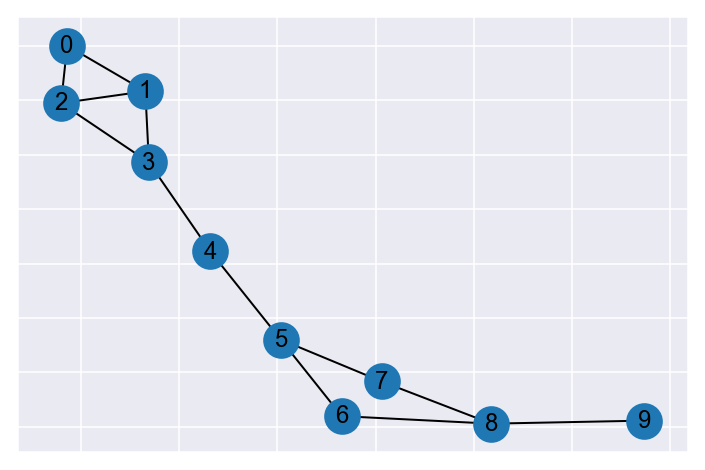

In [11]:
nx.draw_networkx(g)

A node's degree is the number of connections it has.

In [20]:
nx.degree(g, 3)

3

In [19]:
nx.degree(g, 4)

2

The _local clustering coefficient_ is the fraction of a node's connections that are also connected.

In [21]:
nx.clustering(g, 0)

1.0

In [15]:
nx.clustering(g, 4)

0

In [23]:
nx.clustering(g, 1)

0.6666666666666666

Betweenness centrality estimates which nodes are important in connecting networks

In [42]:
df = pd.DataFrame()

df["node"] = g.nodes()
df["centrality"] = pd.Series(nx.degree_centrality(g))
df["eigenvector"] = pd.Series(nx.eigenvector_centrality(g))
df["betweenness"] = pd.Series(nx.betweenness_centrality(g, normalized = True, endpoints = True))

df

,node,centrality,eigenvector,betweenness
0,0,0.222222,0.385777,0.200000
1,1,0.333333,0.514787,0.277778
2,2,0.333333,0.514787,0.277778
3,3,0.333333,0.473312,0.600000
4,4,0.222222,0.233613,0.644444
5,5,0.333333,0.150158,0.655556
6,6,0.222222,0.083563,0.333333
7,7,0.222222,0.083563,0.333333
8,8,0.333333,0.072853,0.388889
9,9,0.111111,0.027299,0.200000


In [32]:
nx.betweenness_centrality(g, normalized = True, endpoints = True)

{0: 0.2,
 1: 0.2777777777777778,
 2: 0.2777777777777778,
 3: 0.6,
 4: 0.6444444444444445,
 5: 0.6555555555555556,
 6: 0.33333333333333337,
 7: 0.33333333333333337,
 8: 0.3888888888888889,
 9: 0.2}